In [1]:
import CrossTabulation as ct
import ClippingRrasterWithShp as cRs
import numpy as np
import pandas as pd
from sklearn.metrics import cohen_kappa_score
import geopandas as gpd 


lucc1996 = r"C:\Users\jyang71\Desktop\Datasets\DLTB\DLTB1996_WH_Erase_Merge_UGB_Dis.tif"
lucc2002 = r"C:\Users\jyang71\Desktop\Datasets\DLTB\DLTB2002_WH_Erase_Merge_UGB_Dis.tif"
lucc2005 = r"C:\Users\jyang71\Desktop\Datasets\DLTB\DLTB2005_WH_Erase_Merge_UGB_Dis.tif"
lucc2010 = r"C:\Users\jyang71\Desktop\Datasets\DLTB\DLTB2010_WH_Erase_Merge_UGB_Dis.tif"
lucc2015 = r"C:\Users\jyang71\Desktop\Datasets\DLTB\DLTB2015_WH_Erase_Merge_UGB_Dis.tif"
clipFc = r"C:\Users\jyang71\Desktop\Datasets\WH_XZQ_Project_Eliminate.shp"
gpdFc1996 = cRs.getLuccArr(lucc1996,clipFc)
gpdFc2002 = cRs.getLuccArr(lucc2002,clipFc)
gpdFc2005 = cRs.getLuccArr(lucc2005,clipFc)
gpdFc2010 = cRs.getLuccArr(lucc2010,clipFc)
gpdFc2015 = cRs.getLuccArr(lucc2015,clipFc)

gpdFc = gpd.read_file(clipFc)

ptnLst = []
shapeLength = gpdFc1996.shape[0]

for i in range(shapeLength):
	mapArr_96 = gpdFc1996.LuccMtx[i][0]
	mapArr_05 = gpdFc2005.LuccMtx[i][0]
	mapArr_10 = gpdFc2010.LuccMtx[i][0]
	mapArr_15 = gpdFc2015.LuccMtx[i][0]
	TM_9605 = ct.transMatrix(mapArr_96,mapArr_05,7)[1]
	gainIntenPtn_9605,lossIntenPtn_9605 = ct.TransPattern(TM_9605,9)
	GainLossPtn_9605 = ct.mergeGainLoss(gainIntenPtn_9605,lossIntenPtn_9605)

	TM_0510 = ct.transMatrix(mapArr_05,mapArr_10,7)[1]
	gainIntenPtn_0510,lossIntenPtn_0510 = ct.TransPattern(TM_0510,5)
	GainLossPtn_0510 = ct.mergeGainLoss(gainIntenPtn_0510,lossIntenPtn_0510)

	TM_1015 = ct.transMatrix(mapArr_10,mapArr_15,7)[1]
	gainIntenPtn_1015,lossIntenPtn_1015 = ct.TransPattern(TM_1015,5)
	GainLossPtn_1015 = ct.mergeGainLoss(gainIntenPtn_1015,lossIntenPtn_1015)

	Ptn = ct.mergeInterval(GainLossPtn_9605,GainLossPtn_0510,GainLossPtn_1015)
	ptnLst.append(list(np.array(Ptn)))

gpdFc['TransPtn'] = ptnLst
#get the transition pattern array with syntax: 		np.array(gpdFc.TransPtn[0])


C:\Users\jyang71\Desktop\LCM_Pattern_Cluster\LCM_Pattern\CrossTabulation.py:56: RuntimeWarning: invalid value encountered in double_scalars
  gainIntensity_ji = (arr[j][i]/duration)/np.sum(arr[j,:])
C:\Users\jyang71\Desktop\LCM_Pattern_Cluster\LCM_Pattern\CrossTabulation.py:59: RuntimeWarning: invalid value encountered in greater_equal
  gainIntenMatr[gainIntenMatr >= average_gain] = 1		# tend to
C:\Users\jyang71\Desktop\LCM_Pattern_Cluster\LCM_Pattern\CrossTabulation.py:60: RuntimeWarning: invalid value encountered in less
  gainIntenMatr[gainIntenMatr < average_gain] = 2			# avoid
C:\Users\jyang71\Desktop\LCM_Pattern_Cluster\LCM_Pattern\CrossTabulation.py:77: RuntimeWarning: invalid value encountered in double_scalars
  lossIntensity_ij = (arr[i][j]/duration)/np.sum(arr[:,j])
C:\Users\jyang71\Desktop\LCM_Pattern_Cluster\LCM_Pattern\CrossTabulation.py:80: RuntimeWarning: invalid value encountered in greater_equal
  lossIntenMatr[lossIntenMatr >= np.array(average_loss).T] = 1    # tend

In [2]:
for i in range(110):
    a = np.array(gpdFc.TransPtn[i])
    b = np.ravel(a)
    c = b[b > 0]
    print(c.shape)

(252,)
(252,)
(252,)
(252,)
(252,)
(240,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(240,)
(252,)
(252,)
(246,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)


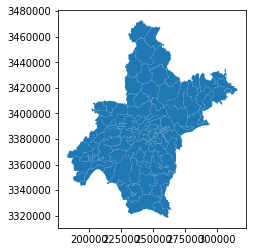

In [5]:
gpdFc.plot();

In [92]:
gpdFc.loc[0].geometry.distance(gpdFc.loc[109].geometry)

14850.41264326637

In [98]:
np.array(gpdFc.loc[0].TransPtn)

array([[0, 0, 1, 2, 2, 2, 1, 3, 2, 1, 2, 2, 1, 3],
       [0, 0, 1, 2, 1, 3, 1, 3, 1, 3, 2, 2, 1, 3],
       [0, 0, 1, 2, 1, 3, 1, 3, 1, 3, 2, 2, 1, 3],
       [1, 1, 0, 0, 2, 1, 1, 3, 2, 1, 2, 2, 1, 3],
       [2, 1, 0, 0, 1, 3, 1, 3, 1, 3, 2, 2, 1, 3],
       [1, 2, 0, 0, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3],
       [2, 2, 2, 2, 0, 0, 1, 3, 2, 1, 1, 2, 1, 3],
       [2, 2, 1, 1, 0, 0, 1, 3, 1, 3, 1, 2, 1, 3],
       [3, 2, 3, 2, 0, 0, 3, 3, 3, 3, 3, 2, 3, 3],
       [3, 2, 3, 2, 3, 2, 0, 0, 3, 1, 3, 2, 3, 3],
       [3, 2, 3, 2, 3, 3, 0, 0, 3, 3, 3, 2, 3, 3],
       [3, 2, 3, 2, 3, 3, 0, 0, 3, 3, 3, 2, 3, 3],
       [3, 2, 3, 2, 3, 2, 3, 3, 0, 0, 3, 2, 3, 3],
       [2, 2, 1, 2, 1, 3, 1, 3, 0, 0, 2, 2, 1, 3],
       [3, 2, 3, 2, 3, 3, 3, 3, 0, 0, 3, 2, 3, 3],
       [2, 2, 2, 1, 1, 1, 1, 3, 1, 1, 0, 0, 1, 3],
       [1, 1, 2, 1, 1, 3, 1, 3, 1, 3, 0, 0, 1, 3],
       [1, 2, 2, 2, 1, 3, 1, 3, 1, 3, 0, 0, 1, 3],
       [2, 2, 1, 2, 2, 2, 1, 3, 1, 1, 2, 2, 0, 0],
       [3, 2, 3, 2, 3, 3, 3, 3,

In [99]:
gpdFc.loc[0].TransPtn

[array([0, 0, 1, 2, 2, 2, 1, 3, 2, 1, 2, 2, 1, 3], dtype=int8),
 array([0, 0, 1, 2, 1, 3, 1, 3, 1, 3, 2, 2, 1, 3], dtype=int8),
 array([0, 0, 1, 2, 1, 3, 1, 3, 1, 3, 2, 2, 1, 3], dtype=int8),
 array([1, 1, 0, 0, 2, 1, 1, 3, 2, 1, 2, 2, 1, 3], dtype=int8),
 array([2, 1, 0, 0, 1, 3, 1, 3, 1, 3, 2, 2, 1, 3], dtype=int8),
 array([1, 2, 0, 0, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3], dtype=int8),
 array([2, 2, 2, 2, 0, 0, 1, 3, 2, 1, 1, 2, 1, 3], dtype=int8),
 array([2, 2, 1, 1, 0, 0, 1, 3, 1, 3, 1, 2, 1, 3], dtype=int8),
 array([3, 2, 3, 2, 0, 0, 3, 3, 3, 3, 3, 2, 3, 3], dtype=int8),
 array([3, 2, 3, 2, 3, 2, 0, 0, 3, 1, 3, 2, 3, 3], dtype=int8),
 array([3, 2, 3, 2, 3, 3, 0, 0, 3, 3, 3, 2, 3, 3], dtype=int8),
 array([3, 2, 3, 2, 3, 3, 0, 0, 3, 3, 3, 2, 3, 3], dtype=int8),
 array([3, 2, 3, 2, 3, 2, 3, 3, 0, 0, 3, 2, 3, 3], dtype=int8),
 array([2, 2, 1, 2, 1, 3, 1, 3, 0, 0, 2, 2, 1, 3], dtype=int8),
 array([3, 2, 3, 2, 3, 3, 3, 3, 0, 0, 3, 2, 3, 3], dtype=int8),
 array([2, 2, 2, 1, 1, 1, 1, 3, 1, 1, 0,

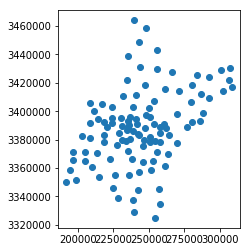

In [10]:
rpoint.plot()

In [12]:
centroid = gpdFc.centroid

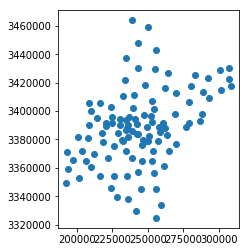

In [13]:
centroid.plot();

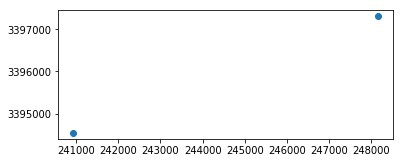

In [25]:
rpoint[1:3].plot()

In [27]:
centroid.distance(gpdFc.geometry[0])

0          0.000000
1       1479.823436
2       2529.386804
3        779.476880
4       1908.107563
5       2582.589604
6       7246.010194
7       5766.085750
8       9617.782077
9      10291.439295
10     10692.267789
11     12252.262611
12     16401.485011
13      6385.572757
14      8249.844702
15     11864.399334
16     20329.844289
17      3295.966397
18     18060.737341
19      5821.833334
20     14758.120176
21     10901.793886
22     29512.349831
23     18316.395378
24     26395.440659
25     33012.130597
26     23957.425161
27     17280.673070
28     14427.372128
29     13196.210515
           ...     
80     34340.452049
81     40435.904203
82     53508.197133
83     63759.447413
84     58181.066031
85     32291.499907
86     48230.033598
87     66369.155802
88     69631.146888
89     47534.852115
90     65702.544520
91     41335.065086
92     30408.298264
93     39578.243735
94      3556.706957
95     10289.749035
96      2821.927754
97     28720.190380
98      9930.672107


In [43]:
df = pd.DataFrame(np.array(range(25)).reshape((5,5)),columns = ['a','b','c','d','e'])

In [44]:
df

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24


In [54]:
df.loc[0:0]

,a,b,c,d,e
0,0,1,2,3,4


In [62]:
gpdFc

,area,xz_ID,geometry,TransPtn
0,37.461746,0,"POLYGON ((245196.7052662201 3395654.955879253,...","[[0, 0, 1, 2, 2, 2, 1, 3, 2, 1, 2, 2, 1, 3], [..."
1,32.128707,1,"POLYGON ((246127.9977300821 3398319.671288075,...","[[0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2], [..."
2,10.758785,2,"POLYGON ((249053.5279977534 3398909.368736333,...","[[0, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2], [..."
3,6.151334,3,"POLYGON ((237567.9180708992 3387955.909025446,...","[[0, 0, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3], [..."
4,16.759394,4,"POLYGON ((236700.8511632368 3393067.70824844, ...","[[0, 0, 1, 2, 1, 1, 1, 3, 2, 2, 2, 2, 1, 3], [..."
5,5.408495,5,"POLYGON ((236394.6852723961 3389458.658487836,...","[[0, 0, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3], [..."
6,24.680368,7,"POLYGON ((227537.4216475239 3392163.239738112,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1], [..."
7,27.709097,8,"POLYGON ((233644.2325777694 3385670.883670883,...","[[0, 0, 1, 1, 2, 2, 1, 3, 1, 3, 2, 2, 1, 3], [..."
8,56.402261,9,"POLYGON ((228717.9280044194 3387327.006541017,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [..."
9,6.987411,10,"POLYGON ((232403.2265438587 3381692.517631772,...","[[0, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2], [..."


In [72]:
import pandas as pd
data = [[1,2,3],[4,5,6]]
index = [0,1]
columns=['a','b','c']
df = pd.DataFrame(data=data, index=index, columns=columns)
df.loc[1]


a    4
b    5
c    6
Name: 1, dtype: int64


In [73]:
df

,a,b,c
0,1,2,3
1,4,5,6


In [75]:
df.loc[0]

a    1
b    2
c    3
Name: 0, dtype: int64

In [100]:
import similarity as sm

In [114]:
gpd1 = gpdFc.loc[0]
gpd2 = gpdFc.loc[100]


In [103]:
gpd1


area                                                  37.4617
xz_ID                                                       0
geometry    POLYGON ((245196.7052662201 3395654.955879253,...
TransPtn    [[0, 0, 1, 2, 2, 2, 1, 3, 2, 1, 2, 2, 1, 3], [...
Name: 0, dtype: object

In [104]:
gpd2

area                                                  32.1287
xz_ID                                                       1
geometry    POLYGON ((246127.9977300821 3398319.671288075,...
TransPtn    [[0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2], [...
Name: 1, dtype: object

In [119]:
sm.similarity(gpd1,gpd2,6000,0.2,0.5,0.5)

-0.17230289078854666

In [116]:
Dis

5908.899606566321

In [2]:
dis2i = gpdFc.distance(gpdFc.loc[0].geometry)

In [10]:
dis2i.shape

(110,)

In [6]:
disArray = np.zeros((shapeLength,shapeLength))

In [11]:
disArray[:,0] = dis2i

In [14]:
disArray[:,0].shape

(110,)

In [15]:
gpdFc.columns

Index(['area', 'xz_ID', 'geometry', 'TransPtn'], dtype='object')

In [18]:
disArray[9,0]

8154.36552641922

In [19]:
disArray = np.zeros((shapeLength,shapeLength))
for i in range(shapeLength):
	dis2i = gpdFc.distance(gpdFc.loc[i].geometry)
	disArray[:,i] = dis2i
maxDistance = max(disArray)



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [30]:
pDdisArray = pd.DataFrame(disArray)

In [67]:
pDdisArray.to_csv(r'C:\Users\jyang71\Desktop\LCM_Pattern_Cluster\distance.csv')

In [48]:
kpArray = np.zeros((shapeLength,shapeLength))
for i in range(shapeLength):
	for j in range(shapeLength):
		kp_ij = ct.kappa(np.array(gpdFc.loc[i].TransPtn),np.array(gpdFc.loc[j].TransPtn))
		kpArray[i][j] = kp_ij
maKp = max(kpArray)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [51]:
kpArray.all()

True

In [38]:
a1 = np.array(gpdFc.loc[100].TransPtn)

In [39]:
a2 = np.array(gpdFc.loc[10].TransPtn)

In [40]:
kp_ij = ct.kappa(a1,a2)

In [41]:
kp_ij

0.2544298921417565

In [47]:
kpArray.all()

True

In [45]:
np.array(gpdFc.loc[100].pa)

array([85.5353137835, 116,
       list([array([0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1], dtype=int8), array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1], dtype=int8), array([0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2], dtype=int8), array([2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int8), array([2, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1], dtype=int8), array([1, 2, 0, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1], dtype=int8), array([2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 1, 1], dtype=int8), array([1, 2, 1, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int8), array([2, 2, 2, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int8), array([2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2], dtype=int8), array([1, 2, 2, 2, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2], dtype=int8), array([2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2], dtype=int8), array([1, 2, 1, 1, 2, 2, 1, 1, 0, 0, 1, 2, 2, 2], dtype=int8), array([1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1], dtype=int8), array([2, 2, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2, 2, 2], dtype=int8), array([2, 2, 2,

In [46]:
a1.all()

False

In [64]:
a3 = kpArray[(np.isfinite(kpArray))]
a3.shape

(12100,)

In [93]:
kpArray

numpy.ndarray

In [68]:
pdKpArray = pd.DataFrame(kpArray)
pdKpArray.to_csv(r'C:\Users\jyang71\Desktop\LCM_Pattern_Cluster\kappa.csv')

In [69]:
max(kpArray)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [71]:
a1 = kpArray.astype(np.float16)

In [72]:
max(a1)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [73]:
a1.all()

True

In [74]:
a1

array([[1.    , 0.288 , 0.287 , ..., 0.27  , 0.2173, 0.2261],
       [0.288 , 1.    , 0.4524, ..., 0.473 , 0.3855, 0.419 ],
       [0.287 , 0.4524, 1.    , ..., 0.4236, 0.3057, 0.4412],
       ...,
       [0.27  , 0.473 , 0.4236, ..., 1.    , 0.4954, 0.686 ],
       [0.2173, 0.3855, 0.3057, ..., 0.4954, 1.    , 0.542 ],
       [0.2261, 0.419 , 0.4412, ..., 0.686 , 0.542 , 1.    ]],
      dtype=float16)

In [75]:
a1

array([[1.    , 0.288 , 0.287 , ..., 0.27  , 0.2173, 0.2261],
       [0.288 , 1.    , 0.4524, ..., 0.473 , 0.3855, 0.419 ],
       [0.287 , 0.4524, 1.    , ..., 0.4236, 0.3057, 0.4412],
       ...,
       [0.27  , 0.473 , 0.4236, ..., 1.    , 0.4954, 0.686 ],
       [0.2173, 0.3855, 0.3057, ..., 0.4954, 1.    , 0.542 ],
       [0.2261, 0.419 , 0.4412, ..., 0.686 , 0.542 , 1.    ]],
      dtype=float16)

In [76]:
a1.dtype

dtype('float16')

In [78]:
pd.DataFrame(np.isfinite(a1))

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [79]:
np.max(a1)

1.0

In [82]:
medoids_idx = random.sample([i for i in range(110)], 5)

In [81]:
import random

In [83]:
medoids_idx

[98, 47, 84, 2, 61]

In [85]:
medoids_idx.index(84)

2

In [87]:
np.max(disArray)

133515.44358779243

In [101]:
disArray = pd.read_csv(r'C:\Users\jyang71\Desktop\LCM_Pattern_Cluster\distance.csv')

In [108]:
disArray2 = disArray['0']

In [114]:
pd.DataFrame(np.array(disArray)[:,1:])

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,0.000000,0.000000,0.000000,0.000000,0.000000,796.949751,3122.912211,1404.514897,5118.048376,8154.365526,...,5908.899607,8526.494706,12492.378375,31921.361233,10064.150574,41073.118766,19489.597856,8884.016102,26231.985106,14850.412643
1,0.000000,0.000000,0.000000,2964.839841,0.000000,2214.861213,3118.229501,5823.079593,7184.018563,10858.792849,...,10945.204332,9257.844279,13074.326574,32942.625426,12446.184292,45076.742209,16918.006873,6011.585181,23692.685393,14134.636279
2,0.000000,0.000000,0.000000,10925.865261,8986.869230,11217.881360,12591.438990,12458.776219,16100.804889,19348.589628,...,16508.986832,5866.901698,22560.630314,42417.009311,21236.407566,52039.258704,18381.513948,8928.330870,21967.582821,10994.349366
3,0.000000,2964.839841,10925.865261,0.000000,0.000000,408.955936,2336.304938,0.000000,3491.414363,6610.569851,...,4682.520896,14653.733782,11164.271966,30446.033679,8656.288253,39497.586936,26563.478757,15961.481264,36371.785553,24394.721288
4,0.000000,0.000000,8986.869230,0.000000,0.000000,0.000000,0.000000,2290.738114,3411.679048,6782.974443,...,8043.190599,16381.042411,9155.490353,29038.128877,8490.038105,41026.670292,21104.389597,10757.363331,32209.210655,24326.692224
5,796.949751,2214.861213,11217.881360,408.955936,0.000000,0.000000,0.000000,1317.853105,1811.882136,5650.438139,...,8168.095310,18650.001904,8330.809269,28076.596916,7078.286865,40221.222553,24625.448845,14589.088761,35602.112364,26616.610978
6,3122.912211,3118.229501,12591.438990,2336.304938,0.000000,0.000000,0.000000,1411.556474,0.000000,5537.882210,...,9112.743739,20677.436763,3456.846155,23310.881101,4542.228290,39118.119350,21188.975820,13343.402943,35349.395564,28164.197482
7,1404.514897,5823.079593,12458.776219,0.000000,2290.738114,1317.853105,1411.556474,0.000000,0.000000,1386.196332,...,0.000025,15440.377517,7264.399969,24768.929607,0.000019,28722.852554,27911.978505,18761.959416,38659.204395,25613.988038
8,5118.048376,7184.018563,16100.804889,3491.414363,3411.679048,1811.882136,0.000000,0.000000,0.000000,0.000000,...,3396.327781,20447.729393,0.000000,16672.600315,0.000000,32194.873077,24121.742320,17359.804326,40014.325592,30515.241470
9,8154.365526,10858.792849,19348.589628,6610.569851,6782.974443,5650.438139,5537.882210,1386.196332,0.000000,0.000000,...,2821.272866,23217.480952,5800.679384,22131.467495,0.000000,30475.399242,31867.675038,23067.120755,44354.109667,33635.695489


In [116]:
list(range(110))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109]

In [117]:
gpdFc

,area,xz_ID,geometry,TransPtn
0,37.461746,0,"POLYGON ((245196.7052662201 3395654.955879253,...","[[0, 0, 1, 2, 2, 2, 1, 3, 2, 1, 2, 2, 1, 3], [..."
1,32.128707,1,"POLYGON ((246127.9977300821 3398319.671288075,...","[[0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2], [..."
2,10.758785,2,"POLYGON ((249053.5279977534 3398909.368736333,...","[[0, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2], [..."
3,6.151334,3,"POLYGON ((237567.9180708992 3387955.909025446,...","[[0, 0, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3], [..."
4,16.759394,4,"POLYGON ((236700.8511632368 3393067.70824844, ...","[[0, 0, 1, 2, 1, 1, 1, 3, 2, 2, 2, 2, 1, 3], [..."
5,5.408495,5,"POLYGON ((236394.6852723961 3389458.658487836,...","[[0, 0, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3], [..."
6,24.680368,7,"POLYGON ((227537.4216475239 3392163.239738112,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1], [..."
7,27.709097,8,"POLYGON ((233644.2325777694 3385670.883670883,...","[[0, 0, 1, 1, 2, 2, 1, 3, 1, 3, 2, 2, 1, 3], [..."
8,56.402261,9,"POLYGON ((228717.9280044194 3387327.006541017,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [..."
9,6.987411,10,"POLYGON ((232403.2265438587 3381692.517631772,...","[[0, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2], [..."


In [201]:
'''
Another clusting method , k-medoids.
See more : http://en.wikipedia.org/wiki/K-medoids
The most common realisation of k-medoid clustering is the Partitioning Around Medoids (PAM) algorithm and is as follows:[2]
1. Initialize: randomly select k of the n data points as the medoids
2. Associate each data point to the closest medoid. ("closest" here is defined using any valid distance metric, most commonly Euclidean distance, Manhattan distance or Minkowski distance)
3. For each medoid m
     For each non-medoid data point o
         Swap m and o and compute the total cost of the configuration
4. Select the configuration with the lowest cost.
5. repeat steps 2 to 4 until there is no change in the medoid.
'''
import random
import numpy as np
import pandas as pd 


def similarity(idx1,idx2,w):
    NormDis = disArray[idx1,idx2]/np.max(disArray)
    NormKp = kpArray[idx1,idx2]
    cost = w * NormDis - (1-w) * NormKp
    return cost

distances_cache = {}

def totalcost(ZoneID, costf, medoids_idx,w):   # ZoneID is the ID number of each zone
    size = len(ZoneID)
    total_cost = 0.0
    medoids = {}
    for idx in medoids_idx :
        medoids[idx] = []
    for i in range(size) :
        choice = None
        min_cost = 2.1
        for m in medoids :
            tmp = distances_cache.get((m,i),None)
            if tmp == None :
                tmp = costf(ZoneID[m],ZoneID[i],w)
                distances_cache[(m,i)] = tmp
            if tmp < min_cost :
                choice = m
                min_cost = tmp
        medoids[choice].append(i)
        total_cost += min_cost
    return total_cost, medoids
    

def kmedoids(ZoneID, k,w):
    size = len(ZoneID)
    medoids_idx = random.sample([i for i in range(size)], k)
    pre_cost, medoids = totalcost(ZoneID,similarity,medoids_idx,w)
    current_cost = 2.1 * size # maxmum of pearson_distances is 2.    
    best_choice = []
    best_res = {}
    iter_count = 0
    while 1 :
        for m in medoids :
            for item in medoids[m] :
                if item != m :
                    idx = medoids_idx.index(m)
                    swap_temp = medoids_idx[idx]
                    medoids_idx[idx] = item
                    tmp,medoids_ = totalcost(ZoneID,similarity,medoids_idx,w)
                    #print tmp,'-------->',medoids_.keys()
                    if tmp < current_cost :
                        best_choice = list(medoids_idx)
                        best_res = dict(medoids_)
                        current_cost = tmp
                    medoids_idx[idx] = swap_temp
        iter_count += 1
        print(current_cost,iter_count)
        if best_choice == medoids_idx : break
        if current_cost <= pre_cost :
            pre_cost = current_cost
            medoids = best_res
            medoids_idx = best_choice
        
    
    return current_cost, best_choice, best_res


if __name__ == '__main__' :
    # read the distanse array and kappa array to use
    disArray = pd.read_csv(r'C:\Users\jyang71\Desktop\LCM_Pattern_Cluster\distance.csv')
    disArray = np.array(disArray)[:,1:]
    kpArray = pd.read_csv(r'C:\Users\jyang71\Desktop\LCM_Pattern_Cluster\kappa.csv')
    kpArray = np.array(kpArray)[:,1:]
    
    #generate a ID list, the IDs in this list should be consistent with the index of the zones that are store in the geoDataFrame
    ZoneID = list(range(110))

    current_cost, best_choice, best_res = kmedoids(ZoneID,8,0)
    print("----"*30)
    print(current_cost)
    print(best_choice)
    print(best_res)

-67.55966196175709 1
-68.193078415917 2
-68.45059978095732 3
-68.69340841689178 4
-68.75331183134716 5
-68.8014916623529 6
-68.86288632775607 7
-68.86288632775607 8
------------------------------------------------------------------------------------------------------------------------
-68.86288632775607
[81, 45, 60, 0, 40, 93, 53, 30]
{81: [22, 25, 35, 39, 41, 65, 71, 75, 78, 80, 81, 83, 84, 86, 87, 89], 45: [45, 46, 91], 60: [50, 56, 58, 59, 60, 73, 74, 76, 77, 90, 108], 0: [0, 3, 4, 5, 7, 9, 10, 11, 13, 14, 15, 17, 20, 21, 29, 33, 94, 96], 40: [6, 8, 18, 27, 28, 31, 32, 37, 38, 40, 43, 48, 55, 66, 67, 69, 70, 82, 85, 99, 100, 101, 102, 103, 104, 107], 93: [19, 36, 47, 88, 93], 53: [1, 16, 23, 24, 42, 44, 49, 51, 52, 53, 54, 57, 61, 62, 63, 64, 68, 72, 79, 92, 97, 98, 106, 109], 30: [2, 12, 26, 30, 34, 95, 105]}


In [196]:
gpdFc_copy = gpdFc

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


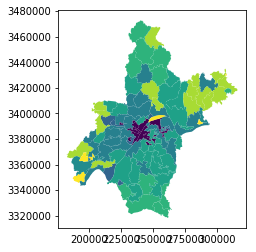

In [202]:
gpdFc_copy['group'] = 0
for i in best_res:
    gpdFc_copy['group'].loc[best_res[i]] = i
gpdFc_copy.plot(column = 'group');

In [203]:
import fiona; fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'OpenFileGDB': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GPKG': 'rw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [207]:
del gpdFc_copy['TransPtn']

In [210]:
gpdFc_copy.to_file(r'C:\Users\jyang71\Desktop\Datasets\GroupedZone\Zones.shp',driver="ESRI Shapefile")
